In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('../eval-amend-result.pkl', 'rb') as file:
    data: pd.DataFrame = pickle.load(file)

In [3]:
data.head()

,new,trivial,optimal,optimal_weights,loss_trivial,loss_gnn,gap_trivial,gap_gnn,weights_trivial,weights_new,filename,stops,lines,line_reps,activities,events,od_pairs
0,2337.0,2337.0,2337.0,"{(1, 2): 14, (3, 4): 32, (5, 6): 36, (7, 8): 0...",0.061671,0.059107,0.0,0.0,"{(1, 2): 38.0, (2, 5): 14.0, (5, 6): 36.0, (2,...","{(1, 2): 0.20888860523700714, (3, 4): 0.026191...",solutions/data/nov-24-preference-fix/job_25312...,5,2,3,34,24,20
1,2337.0,2337.0,2337.0,"{(1, 2): 22, (3, 4): 10, (5, 6): 36, (7, 8): 3...",0.042532,0.061186,0.0,0.0,"{(1, 2): 38.0, (2, 5): 14.0, (5, 6): 36.0, (2,...","{(1, 2): 0.11142860352993011, (3, 4): 0.0, (5,...",solutions/data/nov-24-preference-fix/job_25312...,5,2,3,34,24,20
2,2337.0,2337.0,2337.0,"{(1, 2): 0.0, (3, 4): 10, (5, 6): 22, (7, 8): ...",0.078661,0.056282,0.0,0.0,"{(1, 2): 38.0, (2, 5): 14.0, (5, 6): 36.0, (2,...","{(1, 2): 0.0, (3, 4): 0.18950197100639343, (5,...",solutions/data/nov-24-preference-fix/job_25312...,5,2,3,34,24,20
3,2337.0,2337.0,2337.0,"{(1, 2): 8, (3, 4): 42, (5, 6): 0.0, (7, 8): 3...",0.070635,0.057670,0.0,0.0,"{(1, 2): 38.0, (2, 5): 14.0, (5, 6): 36.0, (2,...","{(1, 2): 0.08464182913303375, (3, 4): 0.281004...",solutions/data/nov-24-preference-fix/job_25312...,5,2,3,34,24,20
4,2337.0,2337.0,2337.0,"{(1, 2): 22, (3, 4): 42, (5, 6): 36, (7, 8): 1...",0.034231,0.055837,0.0,0.0,"{(1, 2): 38.0, (2, 5): 14.0, (5, 6): 36.0, (2,...","{(1, 2): 0.23401574790477753, (3, 4): 0.218551...",solutions/data/nov-24-preference-fix/job_25312...,5,2,3,34,24,20


In [5]:
data[['stops', 'lines', 'line_reps', 'activities', 'events', 'od_pairs']].mean()

stops           5.556317
lines           2.468560
line_reps       4.994711
activities    150.197062
events         55.580020
od_pairs       24.930264
dtype: float64

In [4]:
data.filename.str.findall(r'array_(\d+)').str[0].drop_duplicates()

0       5
426     6
1682    7
2996    8
4093    9
Name: filename, dtype: object

In [40]:
df = data.copy()
df['zero_sp_gap'] = data['gap_trivial'] == 0
df['zero_gnn_gap'] = data['gap_gnn'] == 0
trivial_shares = df.groupby(by='stops')['zero_sp_gap'].mean().sort_index()
gnn_shares = df.groupby(by='stops')['zero_gnn_gap'].mean().sort_index()
stop_shares = (df['stops'].value_counts() / len(df)).sort_index()
stop_shares

stops
4    0.097160
5    0.394907
6    0.372184
7    0.125955
8    0.009794
Name: count, dtype: float64

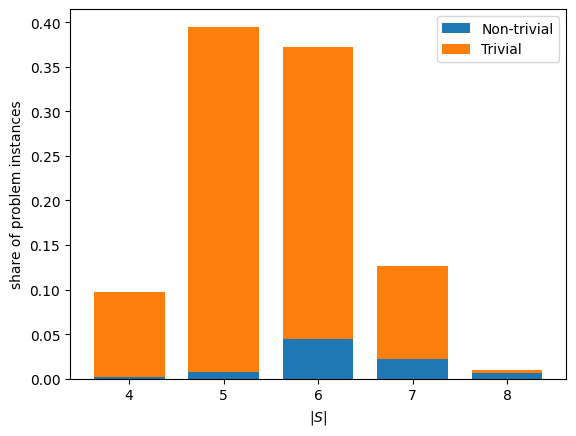

In [32]:
counts = df.groupby(['stops', 'zero_sp_gap']).size().unstack()
counts = counts / counts.values.sum()
ax = counts.plot.bar(stacked=True, width=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.legend(['Non-trivial', 'Trivial'])

ax.set_xlabel('$|S|$')
ax.set_ylabel('share of problem instances')
plt.savefig('figures/trivial_shares_in_data.pdf')


In [43]:
from calc_data_gen_node_count_distribution import get_unique_counts

In [44]:
uniques, counts = get_unique_counts(10000)

In [58]:
data.size

86785

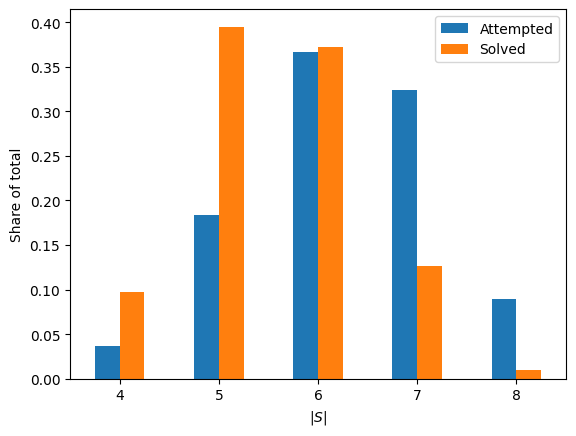

In [77]:

og_dist = pd.Series(counts, index=uniques)
og_dist/og_dist.sum()



# (data['stops'].value_counts() / len(data)).plot.bar(ax=ax)


df_bar = pd.DataFrame(
    data={
        'Attempted': og_dist / og_dist.sum(),
        'Solved': data['stops'].value_counts() / len(data)
    }
)
ax = df_bar.plot.bar(width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# ax.legend(['Non-trivial', 'Trivial'])

ax.set_xlabel('$|S|$')
ax.set_ylabel('Share of total')
plt.savefig('figures/data_gen_shares.pdf')

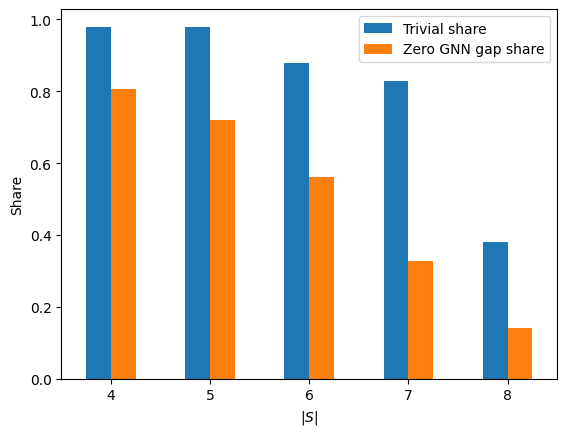

In [78]:
df_bar = pd.DataFrame(
    data={
        'Trivial share': trivial_shares,
        'Zero GNN gap share': gnn_shares,
    }
)

ax = df_bar.plot.bar()

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.set_xlabel('$|S|$')
ax.set_ylabel('Share')
plt.savefig('figures/zero_gap_shares.pdf')


In [79]:
df_bar

,Trivial share,Zero GNN gap share
stops,,
4,0.979839,0.806452
5,0.979663,0.721230
6,0.878947,0.561579
7,0.827372,0.326594
8,0.380000,0.140000


In [37]:
trivial_shares

stops
4    0.979839
5    0.979663
6    0.878947
7    0.827372
8    0.380000
Name: zero_sp_gap, dtype: float64

In [35]:
df['zero_sp_gap'].mean()

0.9171400587659158

In [15]:
df.groupby(['stops', 'zero_sp_gap']).size().unstack()

zero_sp_gap,False,True
stops,,
4,10,486
5,41,1975
6,230,1670
7,111,532
8,31,19


In [9]:
trivial_shares

stops
4    0.979839
5    0.979663
6    0.878947
7    0.827372
8    0.380000
Name: zero_sp_gap, dtype: float64

In [6]:
df['stops'].value_counts().sort_index()

stops
4     496
5    2016
6    1900
7     643
8      50
Name: count, dtype: int64

<BarContainer object of 5 artists>

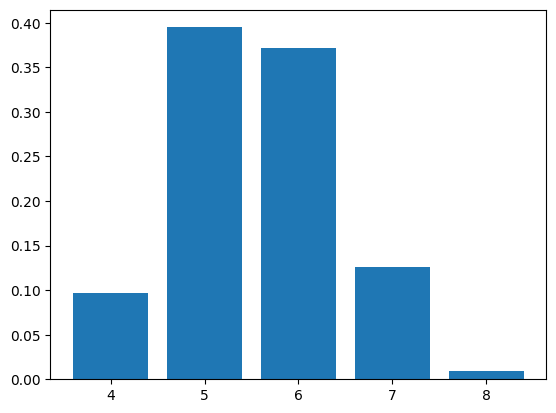

In [7]:
fig, ax = plt.subplots()

ax.bar(x=stop_shares.index, height=stop_shares)

In [17]:
df.shape

(5105, 18)

<BarContainer object of 5 artists>

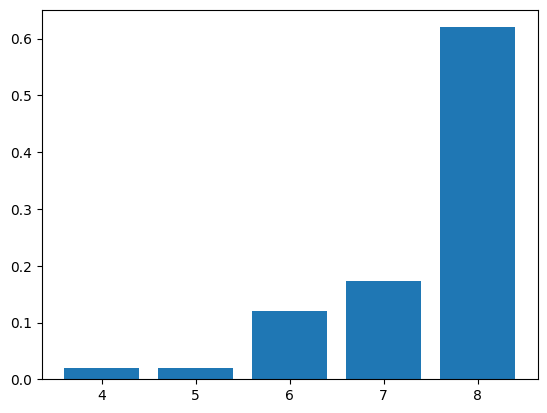

In [18]:
fig, ax = plt.subplots()

ax.bar(x=trivial_shares.index, height=1 - trivial_shares)

<BarContainer object of 5 artists>

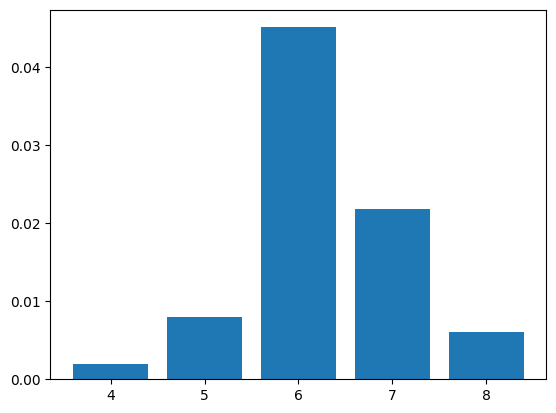

In [19]:
fig, ax = plt.subplots()

ax.bar(x=trivial_shares.index, height=(1 - trivial_shares) * stop_shares)

In [20]:
# from thesis.data.wrapper import Data
from thesis.scripts.eval_amend import get_stats
from pathlib import Path


In [21]:
filenames = list(Path('../.data-for-analysis/').glob('**/*.pkl.gz'))
len(filenames)

5119

In [22]:
subset_stats = pd.DataFrame.from_records(
    [
        get_stats(filename.as_posix()) for filename in filenames
    ]
)

In [23]:
subset_stats.head()

,stops,lines,line_reps,activities,events,od_pairs
0,5,3,8,366,92,20
1,5,2,6,176,64,20
2,6,2,4,72,44,30
3,8,4,7,122,60,37
4,4,2,7,222,68,12


<BarContainer object of 5 artists>

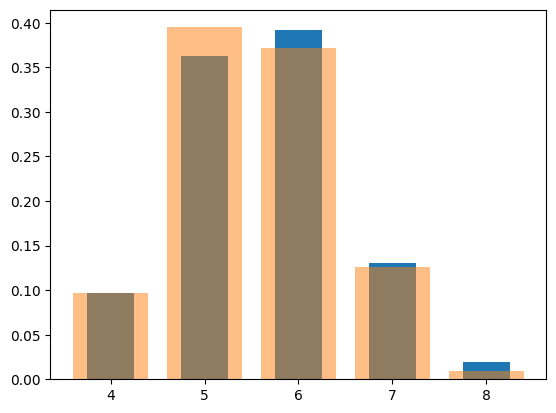

In [24]:
fig, ax = plt.subplots()

subset_stop_shares = subset_stats['stops'].value_counts().sort_index() / len(subset_stats)


ax.bar(x=subset_stop_shares.index, height=subset_stop_shares, width=0.5)
ax.bar(x=subset_stop_shares.index, height=stop_shares, alpha=0.5)



In [25]:
from calc_data_gen_node_count_distribution import get_unique_counts

<Axes: >

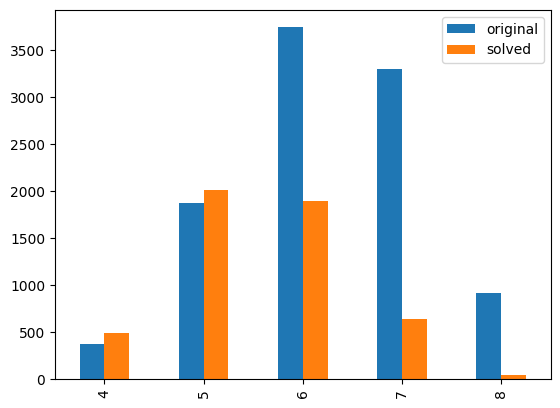

In [28]:
n_attempts = int(len(df) / 0.5)
unique, counts = get_unique_counts(n_attempts)
original_stop_counts = pd.Series(data=counts, index=unique).sort_index()
solved_stop_counts = df['stops'].value_counts().sort_index()

pd.DataFrame({'original': original_stop_counts, 'solved': solved_stop_counts}).plot.bar()